In [2]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.formula.api as smf

import glob
import re
from datetime import datetime

import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
header = 0
dfs = []
for file in glob.glob('../Charts/*/201?/*.csv'):
    region = file.split('/')[2]
    dates = re.findall('\d{4}-\d{2}-\d{2}', file.split('/')[-1])
    weekly_chart = pd.read_csv(file, header=header, sep='\t')
    weekly_chart['week_start'] = datetime.strptime(dates[0], '%Y-%m-%d')
    weekly_chart['week_end'] = datetime.strptime(dates[1], '%Y-%m-%d')
    weekly_chart['region'] = region
    dfs.append(weekly_chart)

all_charts = pd.concat(dfs)

In [4]:

all_charts
    

,position,song_id,song_name,artist,streams,last_week_position,weeks_on_chart,peak_position,position_status,week_start,week_end,region
0,1,7DcvwMAiqKJQD1rrdfxSDx,The London (feat. J. Cole & Travis Scott),Young Thug,11666746,NaN,1,1,new,2019-05-24,2019-05-31,us
1,2,5hVghJ4KaYES3BFUATCYn0,EARFQUAKE,"Tyler, The Creator",10377249,1.0,2,1,-1,2019-05-24,2019-05-31,us
2,3,6u7jPi22kF8CTQ3rb9DHE7,Old Town Road (feat. Billy Ray Cyrus) - Remix,Lil Nas X,10327175,2.0,8,1,-1,2019-05-24,2019-05-31,us
3,4,2Fxmhks0bxGSBdJ92vM42m,bad guy,Billie Eilish,9785130,3.0,9,1,-1,2019-05-24,2019-05-31,us
4,5,3HVWdVOQ0ZA45FuZGSfvns,I Don't Care (with Justin Bieber),Ed Sheeran,8382971,4.0,3,1,-1,2019-05-24,2019-05-31,us
...,...,...,...,...,...,...,...,...,...,...,...,...
195,196,41mt7YrfLrIc4EQJZFCJtw,Como É Que a Gente Fica - Ao Vivo,Henrique & Juliano,295293,188.0,37,25,-8,2017-09-08,2017-09-15,br
196,197,3hjGB7hru53bL066kPSCro,5 Km - Ao Vivo,Henrique & Juliano,294299,199.0,9,172,2,2017-09-08,2017-09-15,br
197,198,0GR7ZABhVF9GbxghIx2RRv,Nada Nada - Ao Vivo,Henrique & Juliano,293247,125.0,37,44,-73,2017-09-08,2017-09-15,br
198,199,0Zu7NVn4IvfYuEIrD11UVr,Na Hora da Raiva - Ao Vivo,Henrique & Juliano,291336,128.0,37,35,-71,2017-09-08,2017-09-15,br


In [5]:
len(all_charts['song_id'].unique())

13880

In [6]:
from spotify_config import config
client_credentials_manager = SpotifyClientCredentials(config['client_id'], config['client_secret'])
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

In [7]:
features = {}

In [8]:
all_tracks_ids = list(all_charts['song_id'].unique())
start = 0
num_tracks = 100
while start < len(all_tracks_ids):
    print(f'getting from {start} to {start+num_tracks}')
    track_batch = all_tracks_ids[start:start+num_tracks]
    features_batch = sp.audio_features(track_batch)
    features.update({track_id : track_features for track_id, track_features in zip(track_batch, features_batch) })
    start += num_tracks

getting from 0 to 100
getting from 100 to 200
getting from 200 to 300
getting from 300 to 400
getting from 400 to 500
getting from 500 to 600
getting from 600 to 700
getting from 700 to 800
getting from 800 to 900
getting from 900 to 1000
getting from 1000 to 1100
getting from 1100 to 1200
getting from 1200 to 1300
getting from 1300 to 1400
getting from 1400 to 1500
getting from 1500 to 1600
getting from 1600 to 1700
getting from 1700 to 1800
getting from 1800 to 1900
getting from 1900 to 2000
getting from 2000 to 2100
getting from 2100 to 2200
getting from 2200 to 2300
getting from 2300 to 2400
getting from 2400 to 2500
getting from 2500 to 2600
getting from 2600 to 2700
getting from 2700 to 2800
getting from 2800 to 2900
getting from 2900 to 3000
getting from 3000 to 3100
getting from 3100 to 3200
getting from 3200 to 3300
getting from 3300 to 3400
getting from 3400 to 3500
getting from 3500 to 3600
getting from 3600 to 3700
getting from 3700 to 3800
getting from 3800 to 3900
getting

In [9]:
len(features)

13880

In [10]:
features

{'7DcvwMAiqKJQD1rrdfxSDx': {'danceability': 0.796,
  'energy': 0.586,
  'key': 4,
  'loudness': -6.946,
  'mode': 0,
  'speechiness': 0.147,
  'acousticness': 0.0247,
  'instrumentalness': 0,
  'liveness': 0.132,
  'valence': 0.179,
  'tempo': 97.981,
  'type': 'audio_features',
  'id': '7DcvwMAiqKJQD1rrdfxSDx',
  'uri': 'spotify:track:7DcvwMAiqKJQD1rrdfxSDx',
  'track_href': 'https://api.spotify.com/v1/tracks/7DcvwMAiqKJQD1rrdfxSDx',
  'analysis_url': 'https://api.spotify.com/v1/audio-analysis/7DcvwMAiqKJQD1rrdfxSDx',
  'duration_ms': 200107,
  'time_signature': 4},
 '5hVghJ4KaYES3BFUATCYn0': {'danceability': 0.554,
  'energy': 0.498,
  'key': 9,
  'loudness': -8.866,
  'mode': 1,
  'speechiness': 0.0685,
  'acousticness': 0.23,
  'instrumentalness': 5.98e-06,
  'liveness': 0.795,
  'valence': 0.413,
  'tempo': 79.635,
  'type': 'audio_features',
  'id': '5hVghJ4KaYES3BFUATCYn0',
  'uri': 'spotify:track:5hVghJ4KaYES3BFUATCYn0',
  'track_href': 'https://api.spotify.com/v1/tracks/5hVghJ

In [11]:
tracks = pd.DataFrame.from_dict(features, orient='index')
tracks

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
7DcvwMAiqKJQD1rrdfxSDx,0.796,0.586,4,-6.946,0,0.1470,0.0247,0.000000,0.1320,0.179,97.981,audio_features,7DcvwMAiqKJQD1rrdfxSDx,spotify:track:7DcvwMAiqKJQD1rrdfxSDx,https://api.spotify.com/v1/tracks/7DcvwMAiqKJQ...,https://api.spotify.com/v1/audio-analysis/7Dcv...,200107,4
5hVghJ4KaYES3BFUATCYn0,0.554,0.498,9,-8.866,1,0.0685,0.2300,0.000006,0.7950,0.413,79.635,audio_features,5hVghJ4KaYES3BFUATCYn0,spotify:track:5hVghJ4KaYES3BFUATCYn0,https://api.spotify.com/v1/tracks/5hVghJ4KaYES...,https://api.spotify.com/v1/audio-analysis/5hVg...,190067,4
6u7jPi22kF8CTQ3rb9DHE7,0.878,0.619,6,-5.560,1,0.1020,0.0533,0.000000,0.1130,0.639,136.041,audio_features,6u7jPi22kF8CTQ3rb9DHE7,spotify:track:6u7jPi22kF8CTQ3rb9DHE7,https://api.spotify.com/v1/tracks/6u7jPi22kF8C...,https://api.spotify.com/v1/audio-analysis/6u7j...,157067,4
2Fxmhks0bxGSBdJ92vM42m,0.701,0.425,7,-10.965,1,0.3750,0.3280,0.130000,0.1000,0.562,135.128,audio_features,2Fxmhks0bxGSBdJ92vM42m,spotify:track:2Fxmhks0bxGSBdJ92vM42m,https://api.spotify.com/v1/tracks/2Fxmhks0bxGS...,https://api.spotify.com/v1/audio-analysis/2Fxm...,194088,4
3HVWdVOQ0ZA45FuZGSfvns,0.798,0.675,6,-5.041,1,0.0442,0.0912,0.000000,0.0894,0.842,101.956,audio_features,3HVWdVOQ0ZA45FuZGSfvns,spotify:track:3HVWdVOQ0ZA45FuZGSfvns,https://api.spotify.com/v1/tracks/3HVWdVOQ0ZA4...,https://api.spotify.com/v1/audio-analysis/3HVW...,219947,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7o2CTH4ctstm8TNelqjb51,0.454,0.910,6,-7.766,1,0.0448,0.0866,0.099600,0.1160,0.629,125.116,audio_features,7o2CTH4ctstm8TNelqjb51,spotify:track:7o2CTH4ctstm8TNelqjb51,https://api.spotify.com/v1/tracks/7o2CTH4ctstm...,https://api.spotify.com/v1/audio-analysis/7o2C...,354520,4
0J6mQxEZnlRt9ymzFntA6z,0.534,0.887,0,-3.777,1,0.0345,0.0768,0.000099,0.3250,0.720,122.494,audio_features,0J6mQxEZnlRt9ymzFntA6z,spotify:track:0J6mQxEZnlRt9ymzFntA6z,https://api.spotify.com/v1/tracks/0J6mQxEZnlRt...,https://api.spotify.com/v1/audio-analysis/0J6m...,249293,4
5UJshy5HDHdNEVqlJwzsQB,0.747,0.701,2,-4.902,1,0.0429,0.1080,0.000000,0.0712,0.589,100.012,audio_features,5UJshy5HDHdNEVqlJwzsQB,spotify:track:5UJshy5HDHdNEVqlJwzsQB,https://api.spotify.com/v1/tracks/5UJshy5HDHdN...,https://api.spotify.com/v1/audio-analysis/5UJs...,228300,4
1dVbxcUqGGEd9oBWUCwmfb,0.593,0.951,4,-3.898,0,0.2090,0.3470,0.000000,0.4220,0.756,183.879,audio_features,1dVbxcUqGGEd9oBWUCwmfb,spotify:track:1dVbxcUqGGEd9oBWUCwmfb,https://api.spotify.com/v1/tracks/1dVbxcUqGGEd...,https://api.spotify.com/v1/audio-analysis/1dVb...,215217,4


In [12]:
tracks = tracks.reset_index(drop=True).rename(columns={'id' : 'song_id'})
tracks

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,song_id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.796,0.586,4,-6.946,0,0.1470,0.0247,0.000000,0.1320,0.179,97.981,audio_features,7DcvwMAiqKJQD1rrdfxSDx,spotify:track:7DcvwMAiqKJQD1rrdfxSDx,https://api.spotify.com/v1/tracks/7DcvwMAiqKJQ...,https://api.spotify.com/v1/audio-analysis/7Dcv...,200107,4
1,0.554,0.498,9,-8.866,1,0.0685,0.2300,0.000006,0.7950,0.413,79.635,audio_features,5hVghJ4KaYES3BFUATCYn0,spotify:track:5hVghJ4KaYES3BFUATCYn0,https://api.spotify.com/v1/tracks/5hVghJ4KaYES...,https://api.spotify.com/v1/audio-analysis/5hVg...,190067,4
2,0.878,0.619,6,-5.560,1,0.1020,0.0533,0.000000,0.1130,0.639,136.041,audio_features,6u7jPi22kF8CTQ3rb9DHE7,spotify:track:6u7jPi22kF8CTQ3rb9DHE7,https://api.spotify.com/v1/tracks/6u7jPi22kF8C...,https://api.spotify.com/v1/audio-analysis/6u7j...,157067,4
3,0.701,0.425,7,-10.965,1,0.3750,0.3280,0.130000,0.1000,0.562,135.128,audio_features,2Fxmhks0bxGSBdJ92vM42m,spotify:track:2Fxmhks0bxGSBdJ92vM42m,https://api.spotify.com/v1/tracks/2Fxmhks0bxGS...,https://api.spotify.com/v1/audio-analysis/2Fxm...,194088,4
4,0.798,0.675,6,-5.041,1,0.0442,0.0912,0.000000,0.0894,0.842,101.956,audio_features,3HVWdVOQ0ZA45FuZGSfvns,spotify:track:3HVWdVOQ0ZA45FuZGSfvns,https://api.spotify.com/v1/tracks/3HVWdVOQ0ZA4...,https://api.spotify.com/v1/audio-analysis/3HVW...,219947,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13875,0.454,0.910,6,-7.766,1,0.0448,0.0866,0.099600,0.1160,0.629,125.116,audio_features,7o2CTH4ctstm8TNelqjb51,spotify:track:7o2CTH4ctstm8TNelqjb51,https://api.spotify.com/v1/tracks/7o2CTH4ctstm...,https://api.spotify.com/v1/audio-analysis/7o2C...,354520,4
13876,0.534,0.887,0,-3.777,1,0.0345,0.0768,0.000099,0.3250,0.720,122.494,audio_features,0J6mQxEZnlRt9ymzFntA6z,spotify:track:0J6mQxEZnlRt9ymzFntA6z,https://api.spotify.com/v1/tracks/0J6mQxEZnlRt...,https://api.spotify.com/v1/audio-analysis/0J6m...,249293,4
13877,0.747,0.701,2,-4.902,1,0.0429,0.1080,0.000000,0.0712,0.589,100.012,audio_features,5UJshy5HDHdNEVqlJwzsQB,spotify:track:5UJshy5HDHdNEVqlJwzsQB,https://api.spotify.com/v1/tracks/5UJshy5HDHdN...,https://api.spotify.com/v1/audio-analysis/5UJs...,228300,4
13878,0.593,0.951,4,-3.898,0,0.2090,0.3470,0.000000,0.4220,0.756,183.879,audio_features,1dVbxcUqGGEd9oBWUCwmfb,spotify:track:1dVbxcUqGGEd9oBWUCwmfb,https://api.spotify.com/v1/tracks/1dVbxcUqGGEd...,https://api.spotify.com/v1/audio-analysis/1dVb...,215217,4


In [13]:
all_charts = pd.merge(all_charts, tracks[['song_id', 'valence']], on='song_id', how='left')
all_charts

,position,song_id,song_name,artist,streams,last_week_position,weeks_on_chart,peak_position,position_status,week_start,week_end,region,valence
0,1,7DcvwMAiqKJQD1rrdfxSDx,The London (feat. J. Cole & Travis Scott),Young Thug,11666746,NaN,1,1,new,2019-05-24,2019-05-31,us,0.179
1,2,5hVghJ4KaYES3BFUATCYn0,EARFQUAKE,"Tyler, The Creator",10377249,1.0,2,1,-1,2019-05-24,2019-05-31,us,0.413
2,3,6u7jPi22kF8CTQ3rb9DHE7,Old Town Road (feat. Billy Ray Cyrus) - Remix,Lil Nas X,10327175,2.0,8,1,-1,2019-05-24,2019-05-31,us,0.639
3,4,2Fxmhks0bxGSBdJ92vM42m,bad guy,Billie Eilish,9785130,3.0,9,1,-1,2019-05-24,2019-05-31,us,0.562
4,5,3HVWdVOQ0ZA45FuZGSfvns,I Don't Care (with Justin Bieber),Ed Sheeran,8382971,4.0,3,1,-1,2019-05-24,2019-05-31,us,0.842
...,...,...,...,...,...,...,...,...,...,...,...,...,...
273595,196,41mt7YrfLrIc4EQJZFCJtw,Como É Que a Gente Fica - Ao Vivo,Henrique & Juliano,295293,188.0,37,25,-8,2017-09-08,2017-09-15,br,0.442
273596,197,3hjGB7hru53bL066kPSCro,5 Km - Ao Vivo,Henrique & Juliano,294299,199.0,9,172,2,2017-09-08,2017-09-15,br,0.512
273597,198,0GR7ZABhVF9GbxghIx2RRv,Nada Nada - Ao Vivo,Henrique & Juliano,293247,125.0,37,44,-73,2017-09-08,2017-09-15,br,0.907
273598,199,0Zu7NVn4IvfYuEIrD11UVr,Na Hora da Raiva - Ao Vivo,Henrique & Juliano,291336,128.0,37,35,-71,2017-09-08,2017-09-15,br,0.448


In [14]:
weekly_valence = all_charts.groupby('week_start').mean()['valence']
weekly_valence.head(5)

week_start
2016-12-30    0.502610
2017-01-06    0.493709
2017-01-13    0.490068
2017-01-20    0.488397
2017-01-27    0.490026
Name: valence, dtype: float64

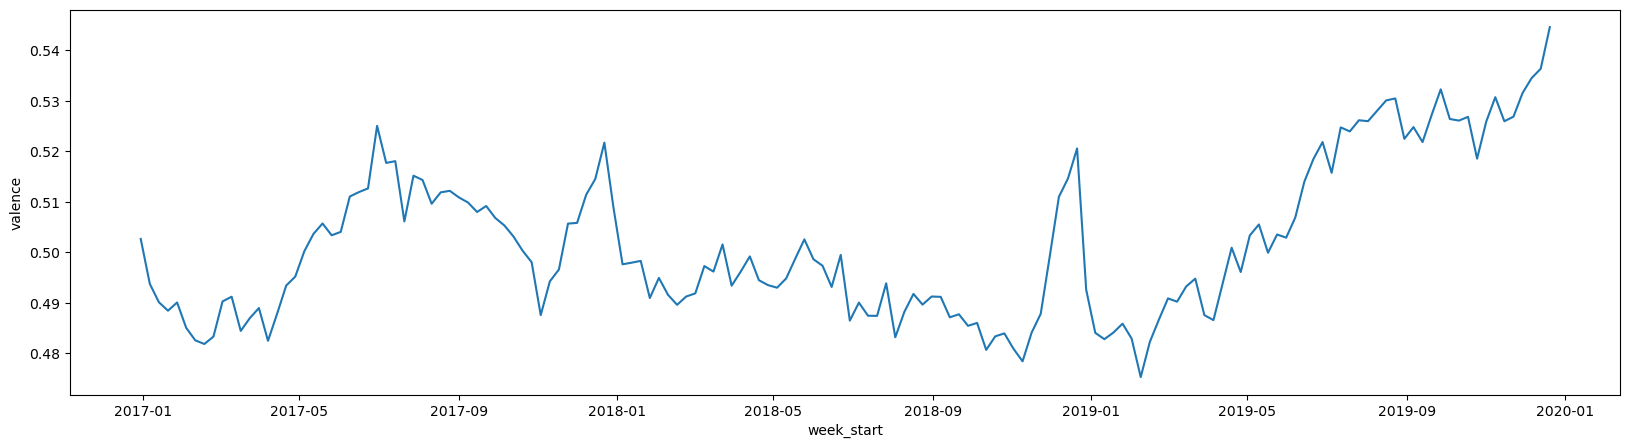

In [15]:
plt.figure(figsize=(20,5))
_ = sns.lineplot(x=weekly_valence.index, y=weekly_valence)

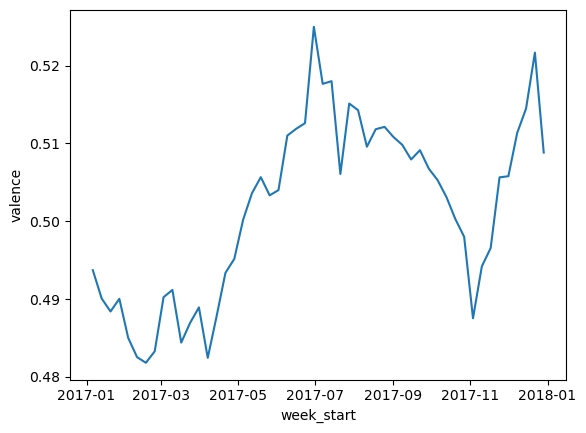

In [16]:
weekly_valence_2017 = weekly_valence[weekly_valence.index.year == 2017]
_ = sns.lineplot(x=weekly_valence_2017.index, y=weekly_valence_2017)

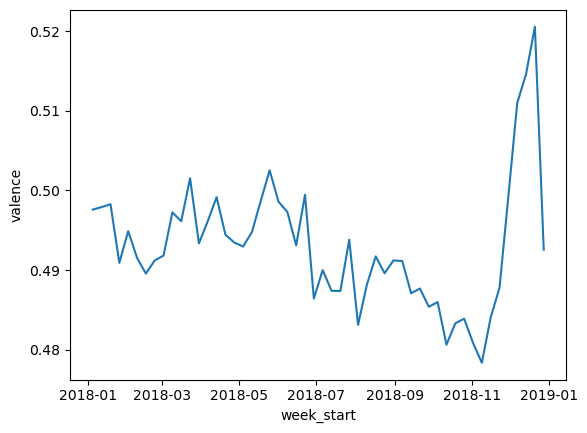

In [17]:
weekly_valence_2018 = weekly_valence[weekly_valence.index.year == 2018]
_ = sns.lineplot(x=weekly_valence_2018.index, y=weekly_valence_2018)

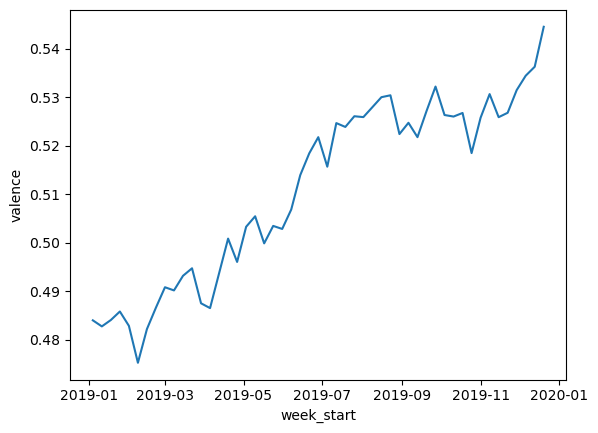

In [18]:
weekly_valence_2019 = weekly_valence[weekly_valence.index.year == 2019]
_ = sns.lineplot(x=weekly_valence_2019.index, y=weekly_valence_2019)

<AxesSubplot:xlabel='valence', ylabel='Count'>

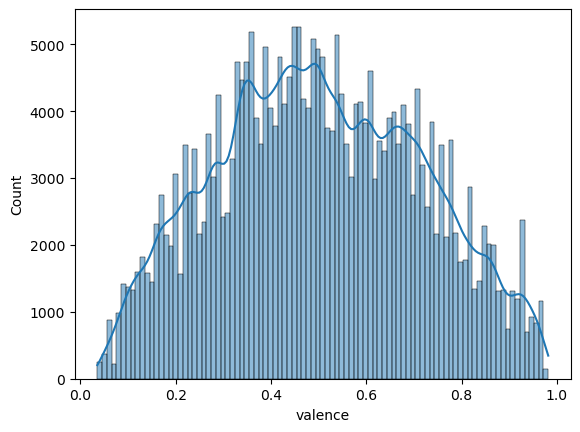

In [19]:
 sns.histplot(x='valence', data=all_charts, kde=True)

<AxesSubplot:xlabel='valence', ylabel='Count'>

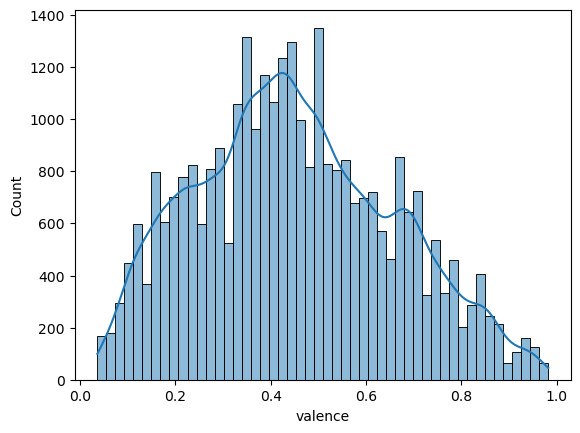

In [20]:
 sns.histplot(x='valence', data=all_charts[all_charts['region'] == 'us'], kde=True)

<AxesSubplot:xlabel='valence', ylabel='Count'>

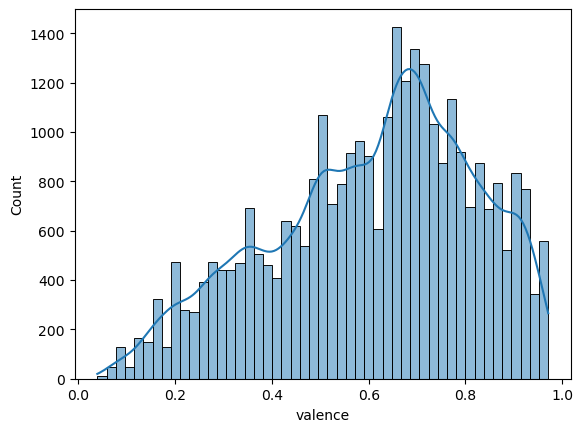

In [21]:
 sns.histplot(x='valence', data=all_charts[all_charts['region'] == 'br'], kde=True)

<Figure size 1600x1000 with 0 Axes>

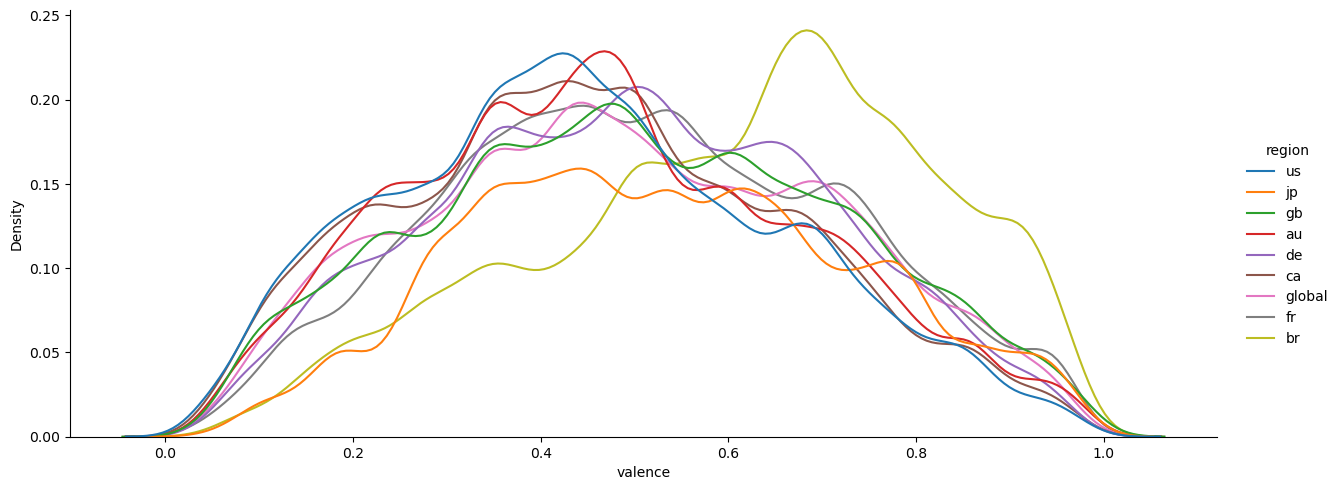

In [22]:
plt.figure(figsize=(16, 10))
_ = sns.displot(x='valence', data=all_charts, hue="region", kind='kde', aspect=2.5)

<AxesSubplot:xlabel='region', ylabel='valence'>

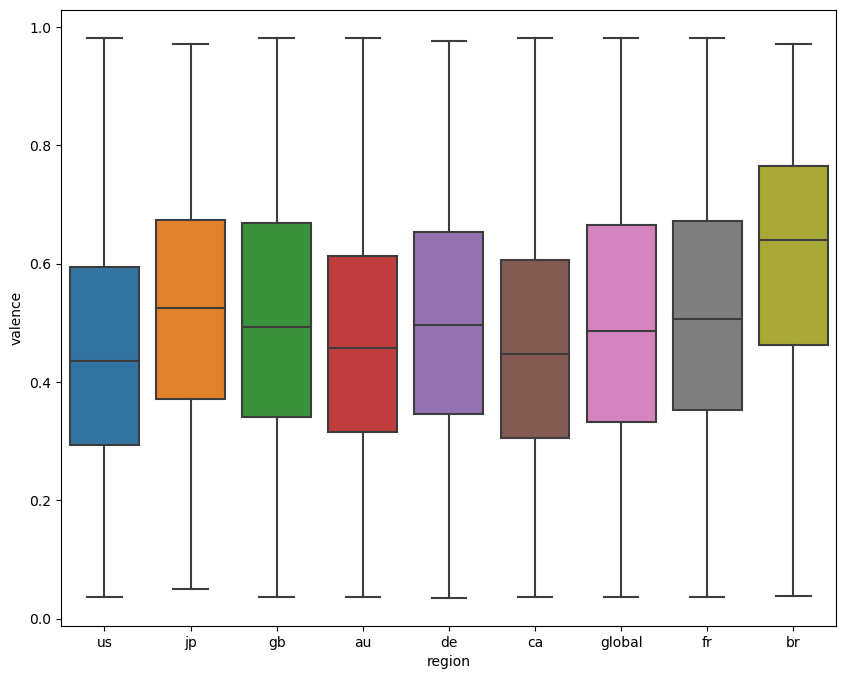

In [23]:
plt.figure(figsize=(10, 8))
sns.boxplot(x='region', y='valence', data=all_charts)

In [24]:
valence_by_region = all_charts[['region', 'valence']].groupby('region').mean().sort_values(by='valence')
valence_by_region.reset_index(inplace=True)
valence_by_region['region_valence_pos'] = valence_by_region.index
valence_by_region

,region,valence,region_valence_pos
0,us,0.450260,0
1,ca,0.459246,1
2,au,0.469907,2
3,global,0.495200,3
4,de,0.499083,4
5,gb,0.501652,5
6,fr,0.510743,6
7,jp,0.529289,7
8,br,0.606865,8


In [25]:
all_charts = pd.merge(all_charts, valence_by_region[['region', 'region_valence_pos']], on='region')
all_charts

,position,song_id,song_name,artist,streams,last_week_position,weeks_on_chart,peak_position,position_status,week_start,week_end,region,valence,region_valence_pos
0,1,7DcvwMAiqKJQD1rrdfxSDx,The London (feat. J. Cole & Travis Scott),Young Thug,11666746,NaN,1,1,new,2019-05-24,2019-05-31,us,0.179,0
1,2,5hVghJ4KaYES3BFUATCYn0,EARFQUAKE,"Tyler, The Creator",10377249,1.0,2,1,-1,2019-05-24,2019-05-31,us,0.413,0
2,3,6u7jPi22kF8CTQ3rb9DHE7,Old Town Road (feat. Billy Ray Cyrus) - Remix,Lil Nas X,10327175,2.0,8,1,-1,2019-05-24,2019-05-31,us,0.639,0
3,4,2Fxmhks0bxGSBdJ92vM42m,bad guy,Billie Eilish,9785130,3.0,9,1,-1,2019-05-24,2019-05-31,us,0.562,0
4,5,3HVWdVOQ0ZA45FuZGSfvns,I Don't Care (with Justin Bieber),Ed Sheeran,8382971,4.0,3,1,-1,2019-05-24,2019-05-31,us,0.842,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
273595,196,41mt7YrfLrIc4EQJZFCJtw,Como É Que a Gente Fica - Ao Vivo,Henrique & Juliano,295293,188.0,37,25,-8,2017-09-08,2017-09-15,br,0.442,8
273596,197,3hjGB7hru53bL066kPSCro,5 Km - Ao Vivo,Henrique & Juliano,294299,199.0,9,172,2,2017-09-08,2017-09-15,br,0.512,8
273597,198,0GR7ZABhVF9GbxghIx2RRv,Nada Nada - Ao Vivo,Henrique & Juliano,293247,125.0,37,44,-73,2017-09-08,2017-09-15,br,0.907,8
273598,199,0Zu7NVn4IvfYuEIrD11UVr,Na Hora da Raiva - Ao Vivo,Henrique & Juliano,291336,128.0,37,35,-71,2017-09-08,2017-09-15,br,0.448,8


In [26]:
all_charts[['region', 'valence']].groupby('region').var()

,valence
region,
au,0.043605
br,0.044167
ca,0.043119
de,0.042372
fr,0.044115
gb,0.047712
global,0.046959
jp,0.041303
us,0.042453


In [44]:
region_valence = all_charts.pivot_table(values='valence', index=all_charts.index, columns='region', aggfunc='first')
region_valence

region,au,br,ca,de,fr,gb,global,jp,us
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.179
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.413
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.639
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.562
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.842
...,...,...,...,...,...,...,...,...,...
273595,NaN,0.442,NaN,NaN,NaN,NaN,NaN,NaN,NaN
273596,NaN,0.512,NaN,NaN,NaN,NaN,NaN,NaN,NaN
273597,NaN,0.907,NaN,NaN,NaN,NaN,NaN,NaN,NaN
273598,NaN,0.448,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [55]:
region_valence_groups = np.split(region_valence.values, region_valence.shape[1] ,axis=1)
for i in region_valence_groups:
    print(i.shape)


(273600, 1)
(273600, 1)
(273600, 1)
(273600, 1)
(273600, 1)
(273600, 1)
(273600, 1)
(273600, 1)
(273600, 1)


In [67]:
region_valence_groups = [c[~np.isnan(c)] for c in region_valence_groups]
for rvc in region_valence_groups:
     print(rvc.shape, rvc)

(31200,) [0.541 0.749 0.546 ... 0.1   0.462 0.72 ]
(31200,) [0.851 0.53  0.658 ... 0.907 0.448 0.346]
(31200,) [0.639 0.562 0.657 ... 0.136 0.48  0.603]
(31200,) [0.31  0.716 0.654 ... 0.241 0.642 0.714]
(31200,) [0.713 0.285 0.726 ... 0.528 0.412 0.332]
(31200,) [0.35  0.947 0.898 ... 0.246 0.967 0.776]
(30800,) [0.842 0.562 0.639 ... 0.679 0.702 0.447]
(24400,) [0.369 0.748 0.494 ... 0.762 0.426 0.529]
(31200,) [0.179 0.413 0.639 ... 0.263 0.144 0.501]


In [78]:
stats.f_oneway(*region_valence_groups)


F_onewayResult(statistic=1527.0698311350407, pvalue=0.0)

In [83]:
region_valence.mod = smf.ols('valence ~ C(region)', data=all_charts)
region_valence.res = region_valence.mod.fit()

In [86]:
anova_table = sm.stats.anova_lm(region_valence.res)
anova_table

,df,sum_sq,mean_sq,F,PR(>F)
C(region),8.0,538.023297,67.252912,1527.069831,0.0
Residual,273591.0,12049.083226,0.044040,NaN,NaN
